In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('datasets/hospitalizaciones_train.csv')

 **Descripción de las dimensiones**
- Available Extra Rooms in Hospital: Habitaciones adicionales disponibles en el hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.
- Department: Área de atención a la que ingresa el paciente. 
- Ward_Facility_Code: Código de la habitación del paciente.
- doctor_name: Nombre de el/la doctor/a a cargo del paciente.
- staff_available: Cantidad de personal disponible al momento del ingreso del paciente.
- patientid: Identificador del paciente.
- Age: Edad del paciente.
- gender: Género del paciente.
- Type of Admission: Tipo de ingreso registrado según la situación de ingreso del paciente.
- Severity of Illness: Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.
- health_conditions: Condiciones de salud del paciente. 
- Visitors with Patient: Cantidad de visitantes registrados para el paciente.
- Insurance: Indica si la persona posee o no seguro de salud. 
- Admission_Deposit: Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación. 
- Stay (in days): Días registrados de estancia hospitalaria.

In [3]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


### Analisis de valores erroneos, duplicados y faltantes

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [5]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


- Veo si en mis variables categoricas tienen errores de tipeo para hacer una normalizacion o no.

In [6]:
col_categoricas = ['Department', 'Ward_Facility_Code','Age',
       'Type of Admission', 'Severity of Illness', 'health_conditions']

for col in col_categoricas :
    val = {col : df_train[col].sort_values().unique()}
    print(val)

{'Department': array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)}
{'Ward_Facility_Code': array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)}
{'Age': array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
       '71-80', '81-90', '91-100'], dtype=object)}
{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object)}
{'Severity of Illness': array(['Extreme', 'Minor', 'Moderate'], dtype=object)}
{'health_conditions': array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)}


- Analizo si existen valores duplicados

In [7]:
df_train.duplicated().unique()

array([False])

### ¿Qué tipo de datos tengo?

* Cuantitativos 
    - Discretos: Available Extra Rooms in Hospital, staff_available, Visitors with Patient, 
    - Continuos: Admission_Deposit
* Cualitativos
    - Nominales: Department, Ward_Facility_Code, doctor_name,patientid, gender, Type of Admission, health_conditions
    - Ordinales: Severity of Illness, Age
    - Binario: Insurance
* Variable a predecir
    - Stay (in days)

### Analisis Categorico

### Analisis Cuantitativo

In [13]:
val_continuos =['Admission_Deposit']
val_discretos = ['Available Extra Rooms in Hospital','staff_available','Visitors with Patient']

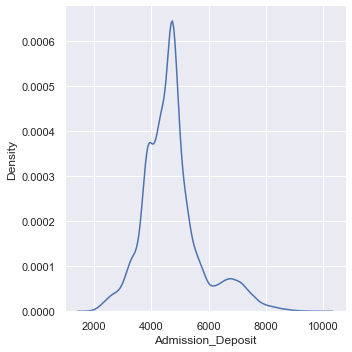

In [19]:
sns.displot(data= df_train,x='Admission_Deposit', kind= 'kde')
plt.show()

## Concluciones

### Primera observación

- El dataset tiene 15 columnas y 410000 filas
- Cada fila corresponde a los datos de un paciente
- No hay datos faltantes (al sacar los valores únicos de cada columna no presentaron valores faltantes)
- No hay filas duplicadas